In [1]:
from glob import glob
import os

import random
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adam_v2, rmsprop_v2, gradient_descent_v2
from keras.callbacks import EarlyStopping

In [21]:
jj = 20

### b dataset
name = f'futures_b{jj}_0.csv'
df_b = pd.read_csv(name, header=None).drop_duplicates().dropna()
cols1 = ['coin', 'target2', 'target1', 'n', 'diff1', 'diff2', 'diff3', 'diff4', 'diff5', 'diff6', 'k1', 'k2']
k = 62-len(cols1)
cols2 = cols1 + [f"val_{i+1}" for i in range(k)]
df_b.columns = cols2

### t dataset
df_t = pd.read_csv(f'futures_t{jj}_0.csv', header=None).drop_duplicates().dropna()
cols1 = ['coin', 'target2', 'target1', 'n', 'diff1', 'diff2', 'diff3', 'diff4', 'diff5', 'diff6', 'k1', 'k2']
k = 62-len(cols1)
cols2 = cols1 + [f"val_{i+1}" for i in range(k)]
df_t.columns = cols2

### a dataset
df_a = pd.read_csv(f'futures_a{jj}_0.csv', header=None).drop_duplicates().dropna()
cols1 = ['coin', 'target2', 'target1', 'n', 'diff1', 'diff2', 'diff3', 'diff4', 'diff5', 'diff6', 'k1', 'k2']
k = 62-len(cols1)
cols2 = cols1 + [f"val_{i+1}" for i in range(k)]
df_a.columns = cols2

dsz = pd.concat([df_t, df_b, df_a], axis=0).drop_duplicates().dropna()
print(dsz.shape, 'all')

lim1, lim2 = 0.0000001, 1.75

ds1 = dsz[dsz.target2>=lim1]
ds2 = dsz[dsz.target2<=-lim1]

ds = pd.concat([ds1, ds2])
ds = ds[ds.target2<lim2]
ds = ds[ds.target2>-lim2]
print(ds.shape, 'limits')

# k1_ = 6
# k2_ = 500

# ds = ds[ds.k1<=k1_]
# ds = ds[ds.k2<=k2_]

D = {}
dss = []
for i in [4]:
    dl = ds[ds.n==i]
    dss.append(dl)
    D[i]=dl
for d in D:
    dx = D[d]
    print(d, dx.shape[0])
print(ds.shape)
ds = pd.concat(dss)

# ds = ds[ds.k2!=3]
ds

(26732, 62) all
(25567, 62) limits
4 25567
(25567, 62)


,coin,target2,target1,n,diff1,diff2,diff3,diff4,diff5,diff6,...,val_41,val_42,val_43,val_44,val_45,val_46,val_47,val_48,val_49,val_50
0,DOGE,0.888207,1,4,-0.097631,-0.058410,-0.042196,-0.003827,-0.168486,-0.168486,...,0.514839,0.485161,0.497651,0.502349,0.467168,0.532832,0.481485,0.518515,0.525204,0.474796
4,DOGE,1.414341,1,4,-0.509628,-0.162154,-0.392262,-0.004995,-0.512742,-0.069183,...,0.537281,0.462719,0.522643,0.477357,0.512124,0.487876,0.458994,0.541006,0.490866,0.509134
8,DOGE,1.117255,1,4,-0.360248,-0.133025,0.026670,-0.088742,-0.443551,-0.091307,...,0.395316,0.604684,0.496105,0.503895,0.455115,0.544885,0.457014,0.542986,0.506646,0.493354
12,DOGE,0.571375,1,4,-0.407767,-0.318588,-0.132380,-0.579851,-0.399608,-0.143624,...,0.443265,0.556735,0.545651,0.454349,0.506436,0.493564,0.506343,0.493657,0.526156,0.473844
16,DOGE,0.125051,1,4,-0.715804,-0.180625,-0.234715,-0.174949,-0.576967,-0.189286,...,0.593935,0.406065,0.591288,0.408712,0.523157,0.476843,0.541641,0.458359,0.549416,0.450584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31550,LINK,-0.100270,0,4,0.263285,0.064739,0.080352,0.015213,0.071124,-0.091296,...,0.493435,0.506565,0.490252,0.509748,0.457598,0.542402,0.446170,0.553830,0.467603,0.532397
31554,LINK,-0.175270,0,4,0.098528,0.130149,0.111400,0.070679,0.263025,0.070679,...,0.548313,0.451687,0.481672,0.518328,0.418176,0.581824,0.431053,0.568947,0.467421,0.532579
31558,LINK,-0.425211,0,4,0.143613,0.020131,0.092156,0.055318,0.161307,0.010066,...,0.459110,0.540890,0.472359,0.527641,0.436482,0.563518,0.462993,0.537007,0.471421,0.528579
31560,LINK,-0.121691,0,4,-0.027356,0.057247,0.069794,0.059657,0.059699,0.139408,...,0.470280,0.529720,0.493116,0.506884,0.442759,0.557241,0.475360,0.524640,0.468469,0.531531


In [3]:
# ds.diff5.plot()

In [4]:
# dt1 = ds[ds.target1==1]
# dt0 = ds[ds.target1==0]
# dt1.shape, dt0.shape

In [793]:
# dt12 = dt1[dt1.diff5<-0.000000001]
# dt02 = dt0[dt0.diff5>0.000000001]

# ds = pd.concat([dt12, dt02])
# ds

In [5]:
dt1 = ds[ds.target1==1]
dt0 = ds[ds.target1==0]
dt1.shape, dt0.shape

((12867, 62), (12700, 62))

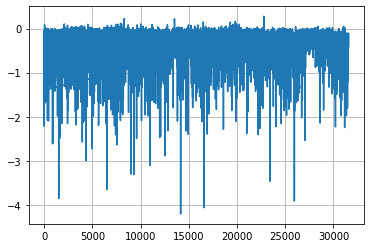

In [6]:
dt1.diff1.plot()
plt.grid()

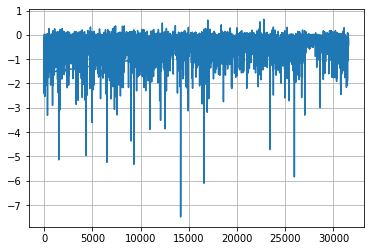

In [7]:
dt1.diff5.plot()
# plt.ylim([None, 0.2])
plt.grid()

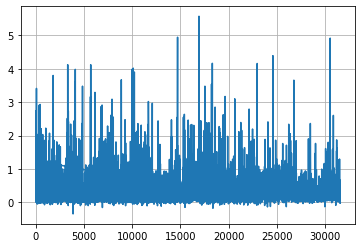

In [8]:
dt0.diff1.plot()
plt.grid()

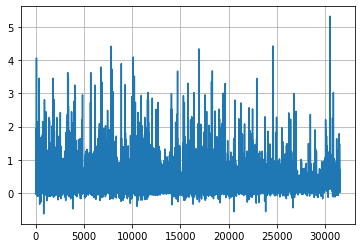

In [9]:
dt0.diff5.plot()
# plt.ylim([0, None])
plt.grid()

In [10]:
ds.groupby('n').size()

n
4    25567
dtype: int64

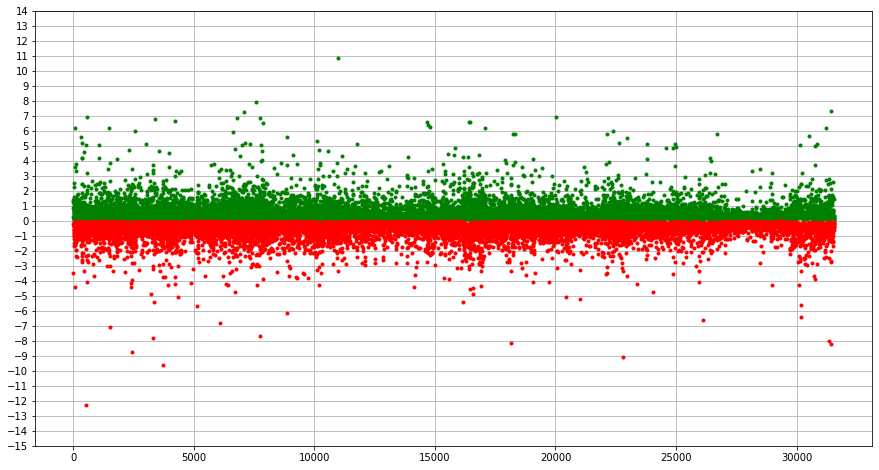

In [11]:
plt.figure(figsize=(15, 8))
plt.plot(dsz.target2[dsz.target1==1], ".", c='g')
plt.plot(dsz.target2[dsz.target1==0], ".", c='r')
# plt.plot(dog13.target2, "x")
# plt.yticks([i/10 for i in range(-10, 11, 5)])
plt.yticks([i/10 for i in range(-150, 150, 10)])
plt.grid()

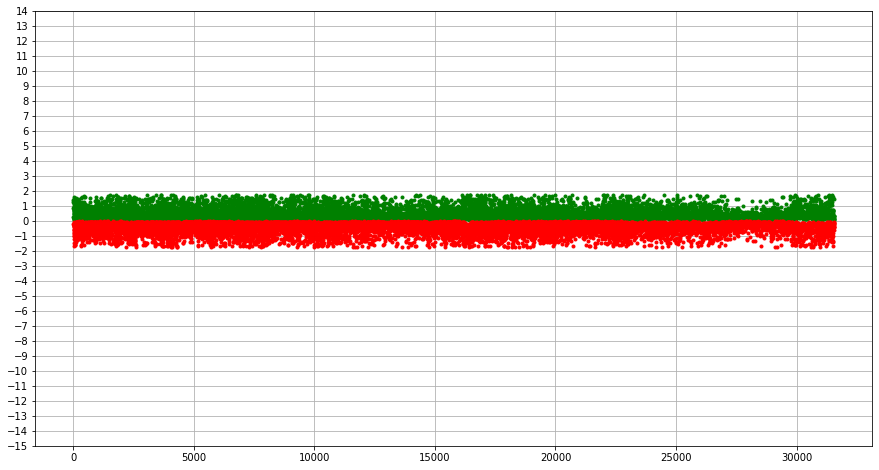

In [12]:
plt.figure(figsize=(15, 8))
plt.plot(ds.target2[ds.target1==1], ".", c='g')
plt.plot(ds.target2[ds.target1==0], ".", c='r')
# plt.plot(dog13.target2, "x")
# plt.yticks([i/10 for i in range(-10, 11, 5)])
plt.yticks([i/10 for i in range(-150, 150, 10)])
plt.grid()

In [13]:
ds.value_counts('k2')

k2
2.0     6678
3.0     4964
4.0     4092
5.0     2932
6.0     2128
7.0     1502
8.0     1002
9.0      716
10.0     547
11.0     342
12.0     221
13.0     162
14.0      98
15.0      86
16.0      35
17.0      21
18.0      18
19.0      10
22.0       4
20.0       3
23.0       2
21.0       1
24.0       1
25.0       1
28.0       1
dtype: int64

<AxesSubplot:>

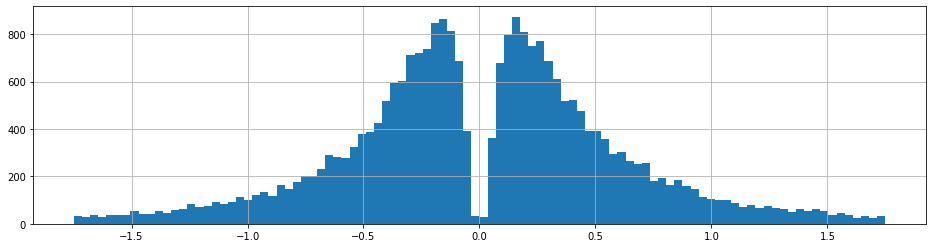

In [14]:
ds.target2.hist(bins=100, figsize=(16, 4))

In [15]:
jsjs = ds.groupby('coin').size().sort_values(ascending=False).to_frame().T
coins = list(jsjs.columns)
# coins = ['ETH', 'DOGE', 'EOS', 'DOT', 'UNI', 'ADA', 'BTC', 'LINK', 'BCH',\
#          'LTC', 'ETC', 'XRP', 'SOL', 'XLM', 'BNB', 'THETA', 'FTM', 'EGLD', 'LUNA', 'FIL']
print(coins)
print(len(coins))
jsjs

['ETH', 'DOGE', 'BTC', 'DOT', 'EOS', 'ETC', 'LTC', 'BCH', 'ADA', 'UNI', 'SOL', 'LINK', 'BNB', 'FIL', 'EGLD', 'XRP', 'THETA', 'FTM', 'AVAX', 'TRX', 'LUNA', 'NEAR', 'GALA', 'MATIC', 'XLM', 'MANA', 'ATOM', 'SAND']
28


coin,ETH,DOGE,BTC,DOT,EOS,ETC,LTC,BCH,ADA,UNI,...,AVAX,TRX,LUNA,NEAR,GALA,MATIC,XLM,MANA,ATOM,SAND
0,2146,2120,1639,1556,1384,1297,1294,1220,1183,1156,...,568,557,503,499,472,467,460,447,378,312


In [918]:
ss = []
# for coin in theCoins:
k1s = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
k2s = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# for k1 in [4, 5, 6, 7, 8, 9, 10, 11, 12]:
for coin in coins:
# for n in [8, 12, 16, 20]:
    # vals = [1, 2, 3, 4, 5, 6, 8, 33, 34, 35, 36, 37, 38, 46, 53, 54, 55, 56, 57, 58, 65, 66, 67, 68]
    # ds = ds[[f"val_{i}" for i in vals]]
    # mm = 4
    ds = D[4] ### [8, 12, 16, 20]
    
#     ss = ['ETH', 'DOGE', 'EOS', 'UNI', 'DOT', 'ADA', 'LINK', 'BTC', 'BCH', 'LTC', 'XRP', 'ETC', 'SOL', 'XLM', 'BNB', 'THETA', 'FTM', 'LUNA', 'FIL', 'EGLD']
#     ss4 = ['EOS', 'DOT', 'UNI', 'ADA', 'BTC', 'LINK', 'BCH', 'LTC', 'XRP', 'XLM', 'BNB', 'THETA', 'FTM', 'EGLD']
#     fs = []
#     for coin in ss4:
#         # print(coin)
#         dr = ds[ds.coin==coin]
#         fs.append(dr)
#     ds = pd.concat(fs)
#     ds
#     ds.shape

#     ds = ds[ds.target2<1.]
#     ds = ds[ds.target2>-1.]
#     print(coin)
    
    dr = ds[ds.coin==coin]
#     dr = ds[ds.k1==k1]
#     dr = dr[dr.k2==k1]
#     dr = ds.copy()
    
    ### data X-Y
    ###  ['coin', 'target2', 'target1', 'n', 'diff1', 'diff2', 'diff3', 'diff4', 'k1', 'k2']
    X = dr.drop(columns=['coin', 'target1', 'target2', 'n', 'k1', 'k2']).values
#     X = dr.drop(columns=['coin', 'target1', 'target2', 'n', 'diff2', 'diff3', 'diff4', 'k1', 'k2']).values
    Y = dr.target1.values

    kl = 0.2
    x_train, x_test, y_train, y_test = train_test_split(X.astype(np.float64), Y, test_size=kl, random_state=42)
    x_train.shape, x_test.shape, y_train.shape, y_test.shape

    scaler = StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    ### model
    model = Sequential()
#     model.add(Dense(50, activation='sigmoid', input_shape=(50,)))
#     model.add(Dropout(.05))
#     model.add(Dense(100, activation='sigmoid'))
#     model.add(Dropout(.05))
#     model.add(Dense(50, activation='sigmoid'))
#     model.add(Dense(50, activation='sigmoid'))
#     model.add(Dense(50, activation='sigmoid'))
    rett = 56
    model.add(Dense(rett, activation='sigmoid', input_shape=(rett,)))
    model.add(Dropout(.05))
    model.add(Dense(rett, activation='sigmoid'))
    model.add(Dropout(.10))
#     model.add(Dense(200, activation='sigmoid'))
#     model.add(Dropout(.15))
#     model.add(Dense(400, activation='sigmoid'))
#     model.add(Dropout(.20))
#     model.add(Dense(800, activation='sigmoid'))
#     model.add(Dropout(.25))
#     model.add(Dense(1600, activation='sigmoid'))
#     model.add(Dropout(.30))

    # model.add(Dense(416, activation='tanh'))
    # model.add(Dropout(.05))
    # model.add(Dense(312, activation='linear'))
    # model.add(Dropout(.05))
    # model.add(Dense(156, activation='relu'))
    # model.add(Dropout(.05))

    # model.add(Dense(106, activation='hard_sigmoid'))
    # model.add(Dense(159, activation='hard_sigmoid'))
    # model.add(Dense(212, activation='hard_sigmoid'))
    # model.add(Dense(2, activation='hard_sigmoid'))

    model.add(Dense(1, activation='sigmoid'))
    
    opt = adam_v2.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    # opt = rmsprop_v2.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    # opt = gradient_descent_v2.SGD(learning_rate=0.001, decay=0.0)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    hist = model.fit(x_train, y_train,
              epochs=80,
              validation_data=(x_test, y_test),
              # callbacks=[callback],
              verbose=0)
    score = model.evaluate(x_test, y_test,verbose=1)
    if score[0]<0.35:
        ss.append(coin)
    
#     print(n, Y.shape, score)
    print(coin, Y.shape, score)
#     print(k1, Y.shape, score)

print(ss)

14/14 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9930
ETH (2146,) [0.03202105686068535, 0.9930232763290405]
14/14 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9858
DOGE (2120,) [0.04767613112926483, 0.9858490824699402]
11/11 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9909
BTC (1639,) [0.019047072157263756, 0.9908536672592163]
10/10 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9840
DOT (1556,) [0.046589192003011703, 0.9839743375778198]
9/9 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9892
EOS (1384,) [0.027748096734285355, 0.9891696572303772]
9/9 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9923
ETC (1297,) [0.023061512038111687, 0.9923076629638672]
9/9 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9884
LTC (1294,) [0.03220360726118088, 0.9884169697761536]
8/8 [=========

In [919]:
len(ss)

28

In [16]:
### data selected
mm = 4
# ds = D[mm]
# ds.shape
# ds

ss = ['DOGE', 'ETH', 'DOT', 'EOS', 'LTC', 'ADA', 'BTC', 'UNI', 'SOL', 'ETC', 'LINK', 'BCH', 'BNB', 'FTM', 'FIL', 'EGLD', 'THETA', 'LUNA', 'AVAX', 'XRP', 'NEAR', 'MATIC', 'GALA', 'MANA', 'TRX', 'XLM', 'ATOM', 'SAND']
print(len(ss))

ss4 = ['ETH', 'EOS', 'DOT', 'UNI', 'BTC', 'LTC', 'XRP', 'BNB', 'THETA', 'LUNA', 'FIL']
ss4 = ['ETH', 'EOS', 'ADA', 'BTC', 'BCH', 'LTC', 'ETC', 'XRP', 'XLM', 'THETA', 'LUNA', 'FIL']
ss4 = ['ETH', 'DOGE', 'DOT', 'ADA', 'BTC', 'BCH', 'LTC', 'ETC', 'XRP', 'XLM', 'THETA', 'LUNA', 'FIL']
ss4 = ['ETH', 'DOT', 'LINK', 'BCH', 'LTC', 'ETC', 'XRP', 'XLM', 'THETA', 'FIL']
ss4 = ['ETH', 'DOGE', 'EOS', 'DOT', 'UNI', 'ADA', 'BTC', 'LINK', 'BCH', 'LTC', 'ETC', 'XRP', 'SOL', 'XLM', 'THETA', 'FTM', 'EGLD', 'LUNA']
ss4 = ['DOGE', 'ETH', 'DOT', 'ADA', 'EOS', 'LTC', 'LINK', 'UNI', 'SOL', 'ETC', 'BCH', 'XLM', 'XRP', 'BTC', 'FIL', 'LUNA', 'FTM', 'THETA', 'BNB', 'MATIC', 'SAND']
ss4 = ['DOGE', 'DOT', 'ETH', 'EOS', 'ADA', 'LINK', 'UNI', 'LTC', 'SOL', 'BCH', 'ETC', 'XRP', 'XLM', 'BTC', 'FTM', 'LUNA', 'EGLD', 'FIL', 'NEAR', 'BNB', 'AVAX', 'MANA', 'GALA', 'MATIC', 'ATOM', 'SAND', 'TRX']
ss4 = ['DOGE', 'DOT', 'ETH', 'ADA', 'EOS', 'LINK', 'UNI', 'LTC', 'SOL', 'ETC', 'XLM', 'BCH', 'XRP', 'BTC', 'FTM', 'LUNA', 'THETA', 'EGLD', 'NEAR', 'FIL', 'AVAX', 'MANA', 'GALA', 'ATOM', 'BNB', 'MATIC', 'SAND', 'TRX']

fs = []
for coin in ss:
    # print(coin)
    dr = ds[ds.coin==coin]
    fs.append(dr)
    
ds = pd.concat(fs)
ds

28


,coin,target2,target1,n,diff1,diff2,diff3,diff4,diff5,diff6,...,val_41,val_42,val_43,val_44,val_45,val_46,val_47,val_48,val_49,val_50
0,DOGE,0.888207,1,4,-0.097631,-0.058410,-0.042196,-0.003827,-0.168486,-0.168486,...,0.514839,0.485161,0.497651,0.502349,0.467168,0.532832,0.481485,0.518515,0.525204,0.474796
4,DOGE,1.414341,1,4,-0.509628,-0.162154,-0.392262,-0.004995,-0.512742,-0.069183,...,0.537281,0.462719,0.522643,0.477357,0.512124,0.487876,0.458994,0.541006,0.490866,0.509134
8,DOGE,1.117255,1,4,-0.360248,-0.133025,0.026670,-0.088742,-0.443551,-0.091307,...,0.395316,0.604684,0.496105,0.503895,0.455115,0.544885,0.457014,0.542986,0.506646,0.493354
12,DOGE,0.571375,1,4,-0.407767,-0.318588,-0.132380,-0.579851,-0.399608,-0.143624,...,0.443265,0.556735,0.545651,0.454349,0.506436,0.493564,0.506343,0.493657,0.526156,0.473844
16,DOGE,0.125051,1,4,-0.715804,-0.180625,-0.234715,-0.174949,-0.576967,-0.189286,...,0.593935,0.406065,0.591288,0.408712,0.523157,0.476843,0.541641,0.458359,0.549416,0.450584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,SAND,-0.435744,0,4,0.603345,0.202185,0.135873,0.191571,0.393112,-0.065220,...,0.400643,0.599357,0.446498,0.553502,0.496528,0.503472,0.498700,0.501300,0.412575,0.587425
3910,SAND,-0.158285,0,4,0.546872,0.008857,0.191309,0.008323,0.717959,-0.037504,...,0.554749,0.445251,0.499434,0.500566,0.506899,0.493101,0.508000,0.492000,0.345261,0.654739
3912,SAND,-0.837373,0,4,0.337410,0.158774,0.111833,0.128917,0.258220,0.158106,...,0.489922,0.510078,0.503960,0.496040,0.485388,0.514612,0.494356,0.505644,0.342319,0.657681
3916,SAND,-0.462297,0,4,0.512189,0.255178,0.144763,0.258754,0.389415,0.102294,...,0.525629,0.474371,0.530645,0.469355,0.463287,0.536713,0.493737,0.506263,0.341110,0.658890


In [922]:
dup = ds[ds.target1==1][['diff1', 'diff2', 'diff3', 'diff4', 'diff5', 'diff6']]
dwn = ds[ds.target1==0][['diff1', 'diff2', 'diff3', 'diff4', 'diff5', 'diff6']]

In [923]:
dup.describe()

,diff1,diff2,diff3,diff4,diff5,diff6
count,12867.000000,12867.000000,12867.000000,12867.000000,12867.000000,12867.000000
mean,-0.373899,-0.132263,-0.126955,-0.116062,-0.396300,-0.110437
std,0.333769,0.168780,0.241525,0.120610,0.390199,0.239161
min,-4.200334,-2.537142,-5.113215,-1.507854,-7.493997,-4.717918
25%,-0.476513,-0.192863,-0.203405,-0.163636,-0.516078,-0.204879
50%,-0.288215,-0.094364,-0.077260,-0.094989,-0.304111,-0.078311
75%,-0.163166,-0.029371,0.002791,-0.047419,-0.161343,0.021072
max,0.277693,0.390641,1.447343,0.552408,0.642202,0.971122


In [924]:
dwn.describe()

,diff1,diff2,diff3,diff4,diff5,diff6
count,12700.000000,12700.000000,12700.000000,12700.000000,12700.000000,12700.000000
mean,0.358529,0.120275,0.115022,0.110307,0.379651,0.102054
std,0.365430,0.160104,0.130442,0.231388,0.392025,0.225520
min,-0.343916,-0.497678,-0.567977,-1.614377,-0.631338,-1.271318
25%,0.146807,0.025158,0.043967,-0.004716,0.147181,-0.018291
50%,0.265724,0.086846,0.091830,0.064936,0.287828,0.073618
75%,0.450308,0.174313,0.157894,0.178590,0.494339,0.188537
max,5.570339,2.180588,1.885194,5.176161,5.326818,4.052231


In [925]:
(ds.diff1>0).sum(), (ds.diff1<0).sum()

(12665, 12894)

In [926]:
(ds.diff2>0).sum(), (ds.diff2<0).sum()

(12639, 12852)

In [927]:
(ds.diff3>0).sum(), (ds.diff3<0).sum()

(14669, 10476)

In [928]:
(ds.diff4>0).sum(), (ds.diff4<0).sum()

(10292, 14875)

(20453, 56) (5114, 56) (20453,) (5114,)
0 0 0 0 0


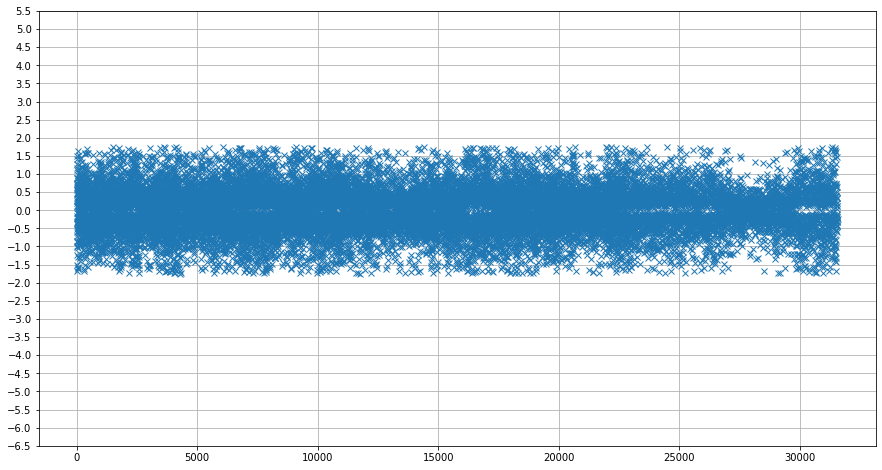

In [56]:
### data to train
# vals = [1, 2, 3, 4, 5, 6, 8, 33, 34, 35, 36, 37, 38, 46, 53, 54, 55, 56, 57, 58, 65, 66, 67, 68]
# koinz = ['EOS', 'UNI', 'XRP', 'ETC', 'DOT']

# COIN = koinz[4]
# COIN = ''
# dz = ds[ds.coin!=COIN]

# dq = dz[[f"val_{i}" for i in vals]]
# dq = dz.copy()
# X = dq.drop(columns=['coin', 'target1', 'target2', 'n', 'diff1', 'diff2', 'k1', 'k2']).values
# X = dq.values

# X = ds.drop(columns=['coin', 'target1', 'target2', 'n', 'k1', 'k2']).values ### ai1
# X = ds.drop(columns=['coin', 'target1', 'target2', 'n', 'diff2', 'diff4', 'k1', 'k2']).values ### ai2
# X = ds.drop(columns=['coin', 'target1', 'target2', 'n', 'diff2', 'diff3', 'diff4', 'k1', 'k2']).values ### ai3
# X = ds.drop(columns=['coin', 'target1', 'target2', 'n', 'diff1', 'diff2', 'diff4', 'k1', 'k2']).values ### ai4
# X = ds.drop(columns=['coin', 'target1', 'target2', 'n', 'diff1', 'diff4', 'k1', 'k2']).values ### ai5
# X = ds.drop(columns=['coin', 'target1', 'target2', 'n', 'diff1', 'diff2', 'k1', 'k2']).values ### ai6
# X = ds.drop(columns=['coin', 'target1', 'target2', 'n', 'diff4', 'k1', 'k2']).values ### ai7
X = ds.drop(columns=['coin', 'target1', 'target2', 'n', 'k1', 'k2']).values ### ai_10
Y = ds.target2.values

kl = 0.2
x_train, x_test, y_train, y_test = train_test_split(X.astype(np.float64), Y, test_size=kl, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print((y_train==1).sum(), (y_train==0).sum(), 0, (y_test==1).sum(), (y_test==0).sum())

plt.figure(figsize=(15, 8))
plt.plot(ds.target2, "x")
# plt.plot(dog13.target2, "x")
# plt.yticks([i/10 for i in range(-10, 11, 5)])
plt.yticks([i/10 for i in range(-65, 58, 5)])
plt.grid()

In [36]:
ret = 56
layers = 0
model = Sequential()
model.add(Dense(ret, activation='sigmoid', input_shape=(ret,)));layers+=1
model.add(Dropout(.05))
model.add(Dense(ret*2, activation='sigmoid'));layers+=1
model.add(Dropout(.10))
model.add(Dense(ret*3, activation='sigmoid'));layers+=1
model.add(Dropout(.15))

# model.add(Dense(52, activation='sigmoid', input_shape=(50,)))
# model.add(Dropout(.05))
# model.add(Dense(104, activation='sigmoid'))
# model.add(Dropout(.10))
# model.add(Dense(208, activation='sigmoid'))
# model.add(Dropout(.15))
# model.add(Dense(416, activation='sigmoid'))
# model.add(Dropout(.20))
# model.add(Dense(832, activation='sigmoid'))
# model.add(Dropout(.25))
# model.add(Dense(1664, activation='sigmoid'))
# model.add(Dropout(.30))

# model.add(Dense(416, activation='tanh'))
# model.add(Dropout(.05))
# model.add(Dense(312, activation='linear'))
# model.add(Dropout(.05))
# model.add(Dense(156, activation='relu'))
# model.add(Dropout(.05))

# model.add(Dense(106, activation='hard_sigmoid'))
# model.add(Dense(159, activation='hard_sigmoid'))
# model.add(Dense(212, activation='hard_sigmoid'))
# model.add(Dense(2, activation='hard_sigmoid'))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 56)                3192      
_________________________________________________________________
dropout_6 (Dropout)          (None, 56)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 112)               6384      
_________________________________________________________________
dropout_7 (Dropout)          (None, 112)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 168)               18984     
_________________________________________________________________
dropout_8 (Dropout)          (None, 168)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

In [37]:
# opt = adam_v2.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
# opt = rmsprop_v2.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
opt = gradient_descent_v2.SGD(learning_rate=0.001, decay=0.0)
model.compile(
              # loss='binary_crossentropy',
              loss='mean_squared_error',
              optimizer=opt,
              metrics=['accuracy'])
# model.compile(optimizer='sgd', loss='mean_squared_error')

# callback= EarlyStopping(monitor='val_loss')
epochs = 65
hist = model.fit(x_train, y_train,
          epochs=epochs,
          validation_data=(x_test, y_test),
          # callbacks=[callback],
          verbose=1)

Epoch 1/65
640/640 [==============================] - 2s 2ms/step - loss: 0.3555 - val_loss: 0.3367
Epoch 2/65
640/640 [==============================] - 1s 2ms/step - loss: 0.3464 - val_loss: 0.3363
Epoch 3/65
640/640 [==============================] - 1s 2ms/step - loss: 0.3461 - val_loss: 0.3361
Epoch 4/65
640/640 [==============================] - 1s 2ms/step - loss: 0.3460 - val_loss: 0.3361
Epoch 5/65
640/640 [==============================] - 1s 2ms/step - loss: 0.3460 - val_loss: 0.3361
Epoch 6/65
640/640 [==============================] - 1s 2ms/step - loss: 0.3459 - val_loss: 0.3361
Epoch 7/65
640/640 [==============================] - 1s 2ms/step - loss: 0.3459 - val_loss: 0.3360
Epoch 8/65
640/640 [==============================] - 1s 2ms/step - loss: 0.3458 - val_loss: 0.3360
Epoch 9/65
640/640 [==============================] - 1s 2ms/step - loss: 0.3459 - val_loss: 0.3360
Epoch 10/65
640/640 [==============================] - 1s 2ms/step - loss: 0.3458 - val_loss: 0.3360

In [38]:
mm

4

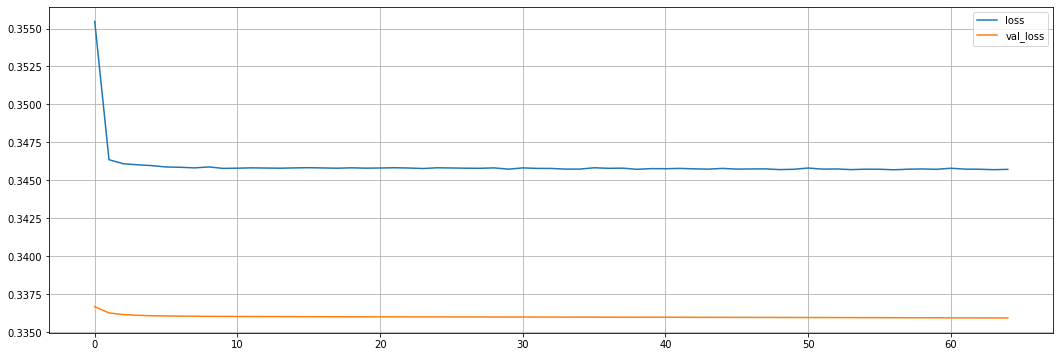

In [39]:
plt.figure(figsize=(18, 6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid()

In [40]:
score = model.evaluate(x_test, y_test,verbose=1)
print(score)

160/160 [==============================] - 0s 1ms/step - loss: 0.3359
0.3359248638153076


In [55]:
# plt.figure(figsize=(18, 6))
# plt.plot(hist.history['accuracy'])
# plt.plot(hist.history['val_accuracy'])
# plt.legend(['accuracy', 'val_accuracy'])
# plt.yticks([i/20 for i in range(0, 21)])
# plt.ylim([0.3, 1.04])
# plt.ylim([None, 1.04])
# plt.grid()

In [42]:
y_pred = model.predict(x_test)

y_actual = y_test
cm = confusion_matrix(list(y_actual.round().astype(int)), list(y_pred[:, 0].round().astype(int)))
texto = classification_report(list(y_actual.round().astype(int)), list(y_pred[:, 0].round().astype(int)), 
                              target_names=['0', '1'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of the Random Forest Classification Model
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

ValueError: Number of classes, 5, does not match size of target_names, 2. Try specifying the labels parameter

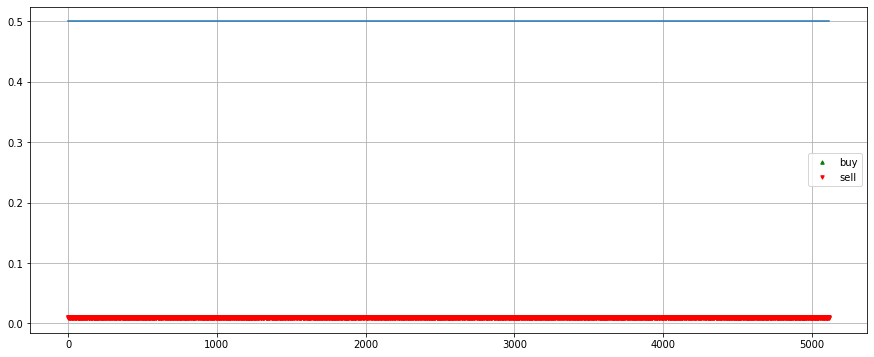

In [43]:
y_pred = model.predict(x_test)

plt.figure(figsize=(15, 6))
plt.plot(y_pred[y_pred>=.5], "^", c='g', markersize=3.5)
plt.plot(y_pred[y_pred<.5], "v", c='r', markersize=3.5)
plt.plot([0, max([len(y_pred[y_pred>=.5]), len(y_pred[y_pred<.5])])], [0.5, 0.5])
# plt.yticks([i/20 for i in range(0, 21)])
plt.legend(['buy', 'sell'])
plt.grid()

In [44]:
weq = y_pred[y_pred>0.9]
print(weq.shape)
weq[weq<1]

(0,)


array([], dtype=float32)

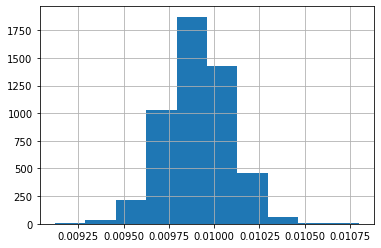

In [45]:
plt.hist(y_pred, bins=10);plt.grid()

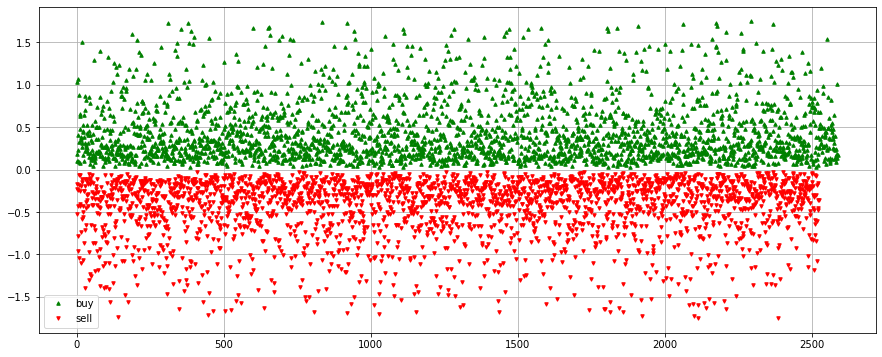

In [48]:
y_cur = y_test
plt.figure(figsize=(15, 6))
plt.plot(y_cur[y_cur>=0], "^", c='g', markersize=3.5)
plt.plot(y_cur[y_cur<0], "v", c='r', markersize=3.5)
# plt.yticks([i/20 for i in range(0, 21)])
plt.legend(['buy', 'sell'])
plt.grid()

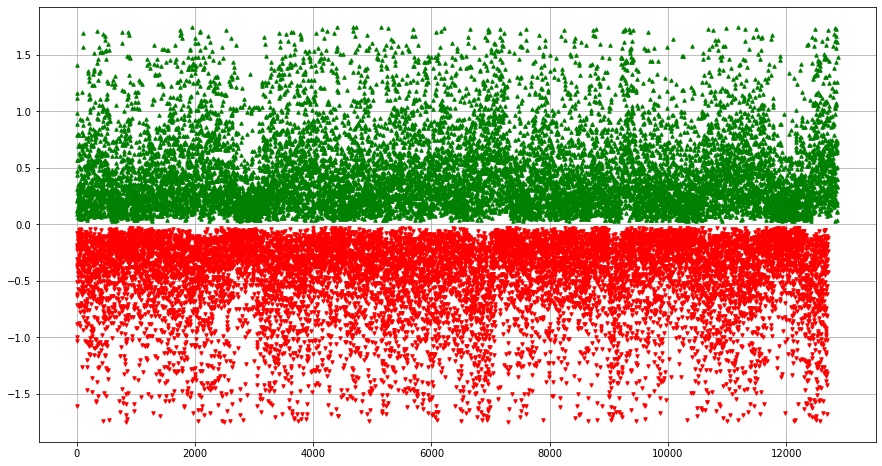

In [51]:
plt.figure(figsize=(15, 8))
# plt.plot(ds.target2, "x")
plt.plot(Y[Y >=0], "^", c='g', markersize=3.5)
plt.plot(Y[Y <0], "v", c='r', markersize=3.5)
# plt.plot(dog13.target2, "x")
# plt.yticks([i/10 for i in range(-10, 11, 5)])
# plt.yticks([i/10 for i in range(-65, 58, 5)])
plt.grid()

In [942]:
COIN = 'ai300'
kl2 = str(kl).replace(".", "p")
lim1x = str(lim1).replace(".", "d")
lim2x = str(float(lim2)).replace(".", "d")
name2 = name.split(".")[0]
# print(name2, mm, kl2)
r223 = None
dj = pl.DataFrame(x_train)
nnn1 = f'scaler_{name2.replace("_0", "d0")}_{COIN}_{kl2}_{lim1x}_{lim2x}_{epochs}e_{layers}ly_{mm}m.csv'.replace('datas', 'all')
nnn2 = f'model_{name2.replace("_0", "d0")}_{COIN}_{kl2}_{lim1x}_{lim2x}_{epochs}e_{layers}ly_{mm}m.h5'.replace('datas', 'all')
dj.to_csv(nnn1, sep="|")
model.save(nnn2)
print(nnn1)
print(nnn2)

scaler_futures_b20d0_ai300_0p2_1e-07_1d75_65e_3ly_4m.csv
model_futures_b20d0_ai300_0p2_1e-07_1d75_65e_3ly_4m.h5


In [57]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

layer_0 = keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([layer_0])

model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500)

print(model.predict([10.0]))

print("Layer variables look like this: {}".format(layer_0.get_weights()))

Epoch 1/500
1/1 [==============================] - 0s 374ms/step - loss: 33.6570
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 26.8084
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 21.4135
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 17.1624
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 13.8114
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 11.1686
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 9.0832
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 7.4364
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 6.1348
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 5.1050
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 4.2890
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 3.6415
Epoch 13/500
1/1 [==============================] - 0

Epoch 206/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0242
Epoch 207/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0237
Epoch 208/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0232
Epoch 209/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0228
Epoch 210/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0223
Epoch 211/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0218
Epoch 212/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0214
Epoch 213/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0209
Epoch 214/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0205
Epoch 215/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0201
Epoch 216/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0197
Epoch 217/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0193
Epoch 218/500
1/1 [=====================

1/1 [==============================] - 0s 3ms/step - loss: 3.7355e-04
Epoch 408/500
1/1 [==============================] - 0s 6ms/step - loss: 3.6588e-04
Epoch 409/500
1/1 [==============================] - 0s 5ms/step - loss: 3.5836e-04
Epoch 410/500
1/1 [==============================] - 0s 4ms/step - loss: 3.5101e-04
Epoch 411/500
1/1 [==============================] - 0s 3ms/step - loss: 3.4380e-04
Epoch 412/500
1/1 [==============================] - 0s 6ms/step - loss: 3.3673e-04
Epoch 413/500
1/1 [==============================] - 0s 4ms/step - loss: 3.2982e-04
Epoch 414/500
1/1 [==============================] - 0s 3ms/step - loss: 3.2304e-04
Epoch 415/500
1/1 [==============================] - 0s 3ms/step - loss: 3.1641e-04
Epoch 416/500
1/1 [==============================] - 0s 4ms/step - loss: 3.0991e-04
Epoch 417/500
1/1 [==============================] - 0s 4ms/step - loss: 3.0354e-04
Epoch 418/500
1/1 [==============================] - 0s 8ms/step - loss: 2.9731e-04
Epoch 